In [39]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import numpy as np
import warnings
import requests

In [40]:

warnings.filterwarnings('ignore')

In [41]:
# function to connect to wiki_dbs and query
def connect_and_query(wiki_name, query, cnf_path = "/home/paws/.my.cnf"):
    
    conn = pymysql.connect(host = wiki_name + '.analytics.db.svc.wikimedia.cloud',
                           read_default_file = cnf_path,
                           database = wiki_name + '_p')
    
    with conn.cursor() as cur:
        cur.execute(query)
        data = cur.fetchall()
    
    
    colnames = [desc[0] for desc in cur.description]
    conn.close()
    return pd.DataFrame(data, columns=colnames)


In [42]:
wikis = ['tewiki', 'hiwiki', 'mlwiki']
all_dfs = []

**Number_of_editors_by_user_edit_bucket**

In [43]:
query_url = "https://raw.githubusercontent.com/venkataeswarachi/community-insights-dashboard-tooling/main/Number_of_editors_by_user_edit_bucket.sql"
query1 = requests.get(query_url).text

In [44]:
query1

"-- Count number of actors in different contribution buckets\nWITH revision_buckets AS (\n    SELECT \n        CASE \n            WHEN COUNT(rev_id) = 0 THEN '0'\n            WHEN COUNT(rev_id) BETWEEN 1 AND 5 THEN '1-5'\n            WHEN COUNT(rev_id) BETWEEN 6 AND 99 THEN '6-99'\n            WHEN COUNT(rev_id) BETWEEN 100 AND 999 THEN '100-999'\n            WHEN COUNT(rev_id) BETWEEN 1000 AND 4999 THEN '1000-4999'\n            ELSE '5000+'\n        END AS bucket\n    FROM revision\n    GROUP BY rev_actor\n) \nSELECT bucket, COUNT(*) AS number_of_editors\nFROM revision_buckets\nGROUP BY bucket\nORDER BY bucket;\n"

Running query on tewiki...
Running query on hiwiki...
Running query on mlwiki...


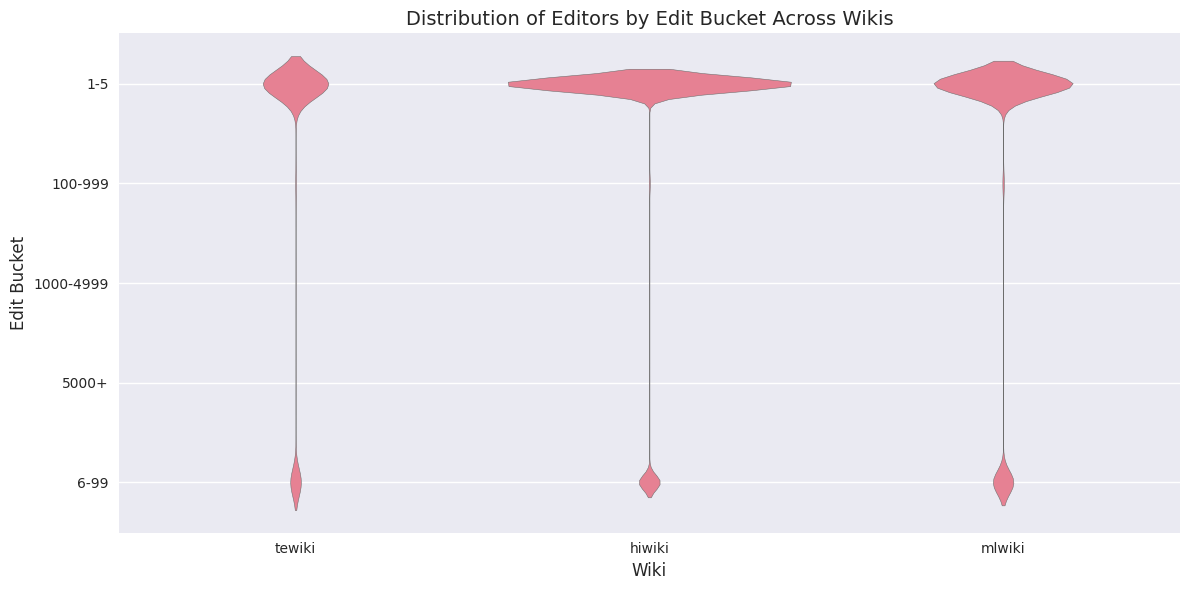

In [46]:
# Imports
import pymysql
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------ Function to connect and query ------------------
def connect_and_query(wiki_name, query, cnf_path="/home/paws/.my.cnf"):
    conn = pymysql.connect(
        host=wiki_name + '.analytics.db.svc.wikimedia.cloud',
        read_default_file=cnf_path,
        database=wiki_name + '_p'
    )
    
    with conn.cursor() as cur:
        cur.execute(query)
        data = cur.fetchall()
        colnames = [desc[0] for desc in cur.description]
    
    conn.close()
    return pd.DataFrame(data, columns=colnames)

# ------------------ Define wikis and fetch SQL query ------------------
wikis = ['tewiki', 'hiwiki', 'mlwiki']
query_url = "https://raw.githubusercontent.com/venkataeswarachi/community-insights-dashboard-tooling/main/Number_of_editors_by_user_edit_bucket.sql"
query1 = requests.get(query_url).text

# ------------------ Clean the SQL query ------------------
query_lines = [line.strip() for line in query1.split('\n') if line.strip() and not line.strip().startswith('--')]
cleaned_query = ' '.join(query_lines)

# ------------------ Execute the query across all wikis ------------------
all_dfs = []

for wiki in wikis:
    print(f"Running query on {wiki}...")
    df = connect_and_query(wiki, cleaned_query)
    df['wiki'] = wiki  # Label each row with its wiki source
    all_dfs.append(df)

# ------------------ Combine all results into one DataFrame ------------------
combined_df = pd.concat(all_dfs, ignore_index=True)

# ------------------ Explode the DataFrame based on 'count' ------------------
exploded_df = combined_df.loc[combined_df.index.repeat(combined_df['number_of_editors'])].reset_index(drop=True)

# ------------------ Create a violin plot ------------------
plt.figure(figsize=(12, 6))
sns.violinplot(x='wiki', y='bucket', data=exploded_df, scale='count', inner=None)

plt.title('Distribution of Editors by Edit Bucket Across Wikis', fontsize=14)
plt.xlabel('Wiki', fontsize=12)
plt.ylabel('Edit Bucket', fontsize=12)
plt.tight_layout()
plt.savefig('violin_plot.png')  # Optional
plt.show()



Number_of_unique_user_by_user_right_currently

In [47]:
query_url = "https://raw.githubusercontent.com/venkataeswarachi/community-insights-dashboard-tooling/main/Number_of_unique_user_by_user_right_currently.sql"
query = requests.get(query_url).text


In [50]:

for wiki in wikis:
    print(f"Running query on {wiki}...")
    df = connect_and_query(wiki, query)
    df['wiki'] = wiki
    all_dfs.append(df)
    
# Combine all DataFrames
combined_df = pd.concat(all_dfs, ignore_index=True)


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
display(combined_df)


Running query on tewiki...
Running query on hiwiki...
Running query on mlwiki...


,bucket,number_of_editors,wiki,ug_group,unique_users
0,1-5,81001.0,tewiki,NaN,NaN
1,100-999,822.0,tewiki,NaN,NaN
2,1000-4999,114.0,tewiki,NaN,NaN
3,5000+,75.0,tewiki,NaN,NaN
4,6-99,13147.0,tewiki,NaN,NaN
5,1-5,380589.0,hiwiki,NaN,NaN
6,100-999,1284.0,hiwiki,NaN,NaN
7,1000-4999,193.0,hiwiki,NaN,NaN
8,5000+,111.0,hiwiki,NaN,NaN
9,6-99,27552.0,hiwiki,NaN,NaN
